Numerical Integral Profile Generation

In [ ]:
import numpy as np
import scipy as sp
from scipy import integrate
from scipy import interpolate
import pandas as pd
import matplotlib.pyplot as plt

##declares
theta_o = 0.0
phi = 0.0
PT_arr = np.array([])
Lo_arr = np.array([])
obs_arr = np.array([])
gammas = [2.6]

##formula stuff
Gtheta = pd.read_csv('GT0.csv', sep = ',', header = None, names = ['theta','gamma'])
Ltheta = pd.read_csv('LT0.csv', sep = ',', header = None, names = ['theta','L'])
Btheta = np.sqrt(1-(1/((Gtheta['gamma'])**2)))

##theta max index calculator
for inmin in gammas:
    Gadjust = (Gtheta['gamma']-inmin)**2
    Gmin = np.where(Gadjust == Gadjust.min())
    GminFar = max(Gmin[0])+1
    theta_max = (int(GminFar)*0.1)
    
    ##theta observed selection and phi integral
    while (theta_o <= (91.0*np.pi/180.0)):
        ##phi selection and theta integral
        while (phi <= 2*np.pi):
            cosalph = (np.cos(theta_o)*np.cos(Ltheta['theta'][0:GminFar]*np.pi/180))+(np.sin(theta_o)*np.sin(Ltheta['theta'][0:GminFar]*np.pi/180)*np.cos(phi))
            num = Ltheta['L']*np.sin(Ltheta['theta'][0:GminFar]*np.pi/180)
            den = 4*np.pi*(Gtheta['gamma'][0:GminFar]**4)*((1-(Btheta*cosalph))**3)
            ans = (num/den)
            theta_int = sp.integrate.trapz(y = ans[0:GminFar], x = Ltheta['theta'][0:GminFar])
            PT_arr_i = np.array([(phi*180.0/np.pi), theta_int])
            PT_arr = np.append(PT_arr, PT_arr_i, 0)
            phi = phi+2*np.pi/72 #2*np.pi/n, count by 360/n degrees at a time
        PT = PT_arr.reshape(73,2) #shape(n rows, 2 columns), n = (phi n + 1) ↓↓ [0:n, a] is the same
        phi_int = sp.integrate.trapz(y = (PT[0:73, 1]), x = (PT[0:73,0]))
        Lo_arr_i = np.array([(theta_o*180.0/np.pi), phi_int])
        Lo_arr = np.append(Lo_arr, Lo_arr_i, 0)    
        theta_o = theta_o+(0.01*np.pi/180.0) #n*np.pi/180, count by n degrees at a time
        phi = 0
        PT_arr = np.array([])
    Lo = Lo_arr.reshape(9101,2)
    Nval = max(Lo[0:9101,1])
    LoN = Lo[0:9101,1]/Nval
    
##Graphing of Normalized Function
plt.yscale("log")
x = Lo[0:9101,0]
y = LoN[0:9101]
plt.scatter(x,y)



Numerical Integral Profile Generation using R(theta)

In [ ]:
import numpy as np
import scipy as sp
from scipy import integrate
from scipy import interpolate
import pandas as pd
import matplotlib.pyplot as plt

##declares
theta_o = 0.0
phi = 0.0
PT_arr = np.array([])
Lo_arr = np.array([])
obs_arr = np.array([])
gammas = [2.6]

##formula stuff
Gtheta = pd.read_csv('GT0.csv', sep = ',', header = None, names = ['theta','gamma'])
Ltheta = pd.read_csv('LT0.csv', sep = ',', header = None, names = ['theta','L'])
Btheta = np.sqrt(1-(1/((Gtheta['gamma'])**2)))
Rx = 0.0
Ry = 2.0

##theta max index calculator
for inmin in gammas:
    Gadjust = (Gtheta['gamma']-inmin)**2
    Gmin = np.where(Gadjust == Gadjust.min())
    GminFar = max(Gmin[0])+1
    theta_max = (int(GminFar)*0.1)
    
    ##theta observed selection and phi integral
    while (theta_o <= (91.0*np.pi/180.0)):
        ##phi selection and theta integral
        while (phi <= 2*np.pi):
            cosalph = (np.cos(theta_o)*np.cos(Ltheta['theta'][0:GminFar]*np.pi/180))+(np.sin(theta_o)*np.sin(Ltheta['theta'][0:GminFar]*np.pi/180)*np.cos(phi))
            num = Ltheta['L']*np.sin(Ltheta['theta'][0:GminFar]*np.pi/180)
            den = 4*np.pi*(Gtheta['gamma'][0:GminFar]**4)*((Gtheta['gamma'][0:GminFar]**Ry)*(Ltheta['L'][0:GminFar]**Rx))*((1-(Btheta*cosalph))**4)
            ans = (num/den)
            theta_int = sp.integrate.trapz(y = ans[0:GminFar], x = Ltheta['theta'][0:GminFar])
            PT_arr_i = np.array([(phi*180.0/np.pi), theta_int])
            PT_arr = np.append(PT_arr, PT_arr_i, 0)
            phi = phi+2*np.pi/72 #2*np.pi/n, count by 360/n degrees at a time
        PT = PT_arr.reshape(73,2) #shape(n rows, 2 columns), n = (phi n + 1) ↓↓ [0:n, a] is the same
        phi_int = sp.integrate.trapz(y = (PT[0:73, 1]), x = (PT[0:73,0]))
        Lo_arr_i = np.array([(theta_o*180.0/np.pi), phi_int])
        Lo_arr = np.append(Lo_arr, Lo_arr_i, 0)    
        theta_o = theta_o+(0.01*np.pi/180.0) #n*np.pi/180, count by n degrees at a time
        phi = 0
        PT_arr = np.array([])
    Lo = Lo_arr.reshape(9101,2)
    Nval = max(Lo[0:9101,1])
    LoN = Lo[0:9101,1]/Nval
    
##Graphing of Normalized Function
plt.yscale("log")
x = Lo[0:9101,0]
y = LoN[0:9101]
plt.scatter(x,y)



Numerical Integral Profile Generation using R(theta) BRIEF

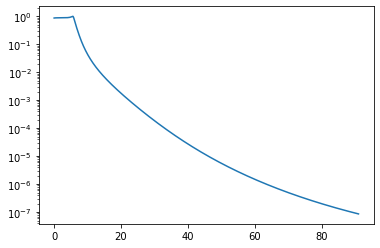

In [3]:
##### 2017 paper program #####
import numpy as np
import scipy as sp
from scipy import integrate
from scipy import interpolate
import pandas as pd
import matplotlib.pyplot as plt

##declares
theta_o = 0.0
phi = 0.0
PT_arr = np.array([])
Lo_arr = np.array([])
obs_arr = np.array([])
gammas = [2.6]

##formula stuff
#sim set
#Gtheta = pd.read_csv('GT0.csv', sep = ',', header = None, names = ['theta','gamma'])
#Ltheta = pd.read_csv('LT0.csv', sep = ',', header = None, names = ['theta','L'])
#appr set
Gtheta = pd.read_csv('func_gamma_delta_45_theta_01deg.csv', sep = ',', header = None, names = ['theta','gamma'])
Ltheta = pd.read_csv('func_epsilon_delta_45_theta_01deg.csv', sep = ',', header = None, names = ['theta','L'])
Btheta = np.sqrt(1-(1/((Gtheta['gamma'])**2)))
Rx = 0.0
Ry = 2.0

##theta max index calculator
for inmin in gammas:
    Gadjust = (Gtheta['gamma']-inmin)**2
    Gmin = np.where(Gadjust == Gadjust.min())
    GminFar = max(Gmin[0])+1
    theta_max = (int(GminFar)*0.1)
    
    ##theta observed selection and phi integral
    while (theta_o <= (91.0*np.pi/180.0)):
        ##phi selection and theta integral
        while (phi <= 2*np.pi):
            cosalph = (np.cos(theta_o)*np.cos(Ltheta['theta'][0:GminFar]*np.pi/180))+(np.sin(theta_o)*np.sin(Ltheta['theta'][0:GminFar]*np.pi/180)*np.cos(phi))
            num = Ltheta['L']*np.sin(Ltheta['theta'][0:GminFar]*np.pi/180)
            den = 4*np.pi*(Gtheta['gamma'][0:GminFar]**4)*((Gtheta['gamma'][0:GminFar]**Ry)*(Ltheta['L'][0:GminFar]**Rx))*((1-(Btheta*cosalph))**4)
            ans = (num/den)
            theta_int = sp.integrate.trapz(y = ans[0:GminFar], x = Ltheta['theta'][0:GminFar])
            PT_arr_i = np.array([(phi*180.0/np.pi), theta_int])
            PT_arr = np.append(PT_arr, PT_arr_i, 0)
            phi = phi+2*np.pi/72 #2*np.pi/n, count by 360/n degrees at a time
        PT = PT_arr.reshape(73,2) #shape(n rows, 2 columns), n = (phi n + 1) ↓↓ [0:n, a] is the same
        phi_int = sp.integrate.trapz(y = (PT[0:73, 1]), x = (PT[0:73,0]))
        Lo_arr_i = np.array([(theta_o*180.0/np.pi), phi_int])
        Lo_arr = np.append(Lo_arr, Lo_arr_i, 0)    
        theta_o = theta_o+(0.01*np.pi/180.0) #n*np.pi/180, count by n degrees at a time
        phi = 0
        PT_arr = np.array([])
    Lo = Lo_arr.reshape(9101,2)
    Nval = max(Lo[0:9101,1])
    LoN = Lo[0:9101,1]/Nval
    
##Graphing of Normalized Function
plt.yscale("log")
x = Lo[0:9101,0]
y = LoN[0:9101]
plt.plot(x,y)


Data Saver

In [4]:
MCprofile = open("MCprofileAnalyticx0y2", "w")
i=0
while (i < len(LoN)):
    MCprofile.write(str(Lo[i,0]*np.pi/180) + "," + str(LoN[i]) + "\n")
    i+=1
MCprofile.close()

Analytical Function Integral Profile Generation

In [ ]:
import numpy as np
import scipy as sp
from scipy import integrate
from scipy import interpolate
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7), dpi=80)

#--------------------------------
#################Simulation PW Function Gamma
#Simulation Structure Normalization
SPW_Etheta = pd.read_csv('func_epsilon_delta_45_theta_01.csv', sep = ',', header = None, names = ['theta','L'])
SPW_Gtheta = pd.read_csv('func_gamma2.csv', sep = ',', header = None, names = ['theta','G'])
SPW_Nval = max(SPW_Gtheta['G'])
SPW_NGtheta = SPW_Gtheta['G']/SPW_Nval
i = 0
SPW_RNE_arr = np.array([])
while (i <= 3142):
    if (SPW_Etheta['L'][i]/(.9999999999999970024)) > 1:
        SPW_RNEtheta_i = 1.0
    else:
        SPW_RNEtheta_i = SPW_Etheta['L'][i]/(.9999999999999970024)
    SPW_RNE_arr_i = np.array([SPW_RNEtheta_i])
    SPW_RNE_arr = np.append(SPW_RNE_arr, SPW_RNE_arr_i)
    i = i+1
SPW_RNE = SPW_RNE_arr.reshape(3143,1)
#
##Simulation Piecewise Array
#spw_arr = np.array([])
#SPW_theta_core = 10.0
#SPW_theta_o = 0.0
#while (SPW_theta_o <= 181.0):
#    adjtheta = ((SPW_Gtheta['theta'])-SPW_theta_o)**2 #square subtracts to find the closest theta value in the profile, double return
#    mintheta = np.where(adjtheta == adjtheta.min()) #find the array index of the smallest adjusted theta (nearest to random), array return
#    at_theta = max(mintheta[0])
#    SPW_Gamma = SPW_NGtheta[at_theta]
#    if SPW_theta_o < SPW_theta_core:
#        Sy = 1
#    elif SPW_theta_core < SPW_theta_o < 2*SPW_theta_core:
#        Sq = (SPW_theta_o-SPW_theta_core)*SPW_Gamma
#        Sy = Sq**(-4)
#    elif 2*SPW_theta_core < SPW_theta_o:
#        Sq = (SPW_theta_o-SPW_theta_core)*SPW_Gamma
#        Sy = (Sq**(-6))*((SPW_theta_core*SPW_Gamma)**2)
#    spw_arr_i = np.array([(SPW_theta_o), Sy])
#    spw_arr = np.append(spw_arr, spw_arr_i, 0)
#    SPW_theta_o = SPW_theta_o + 0.1
#SPW = spw_arr.reshape(1811,2)

##Piecewise-Structure Max Comparison
#i=0
#CompPW1_arr = np.array([])
#while (i <= 1810):
#    Cmax1 = max(SPW_RNE[i],SPW[i,1])
#    CompPW1_arr_i = np.array([SPW[i,0], Cmax1])
#    CompPW1_arr = np.append(CompPW1_arr, CompPW1_arr_i, 0)
#    i+=1
#CPW1 = CompPW1_arr.reshape(1811,2)

#x1 = CPW1[101:1811,0]
#y1 = CPW1[101:1811,1]/max(CPW1[101:1811,1])
#plt.plot(x1,y1,color='blue',label='Simulation 3-piece wrt function gamma')
#x2 = CPW1[0:101,0]
#y2 = CPW1[0:101,1]
#plt.plot(x2,y2,color='blue')

#--------------------------------
#################Simulation PW Const Gamma
#Simulation Piecewise Array
spw_arr2 = np.array([])
SPW_theta_core = 0.1
SPW_theta_o = 0.0
SPW_Gamma2 = 100.0
while (SPW_theta_o <= np.pi):
    if SPW_theta_o < SPW_theta_core:
        Sy2 = 1
    elif SPW_theta_core <= SPW_theta_o < 2*SPW_theta_core:
        Sq2 = (SPW_theta_o-SPW_theta_core)*SPW_Gamma2
        Sy2 = Sq2**(-4)
    elif 2*SPW_theta_core <= SPW_theta_o:
        Sq2 = (SPW_theta_o-SPW_theta_core)*SPW_Gamma2
        Sy2 = (Sq2**(-6))*((SPW_theta_core*SPW_Gamma2)**2)
    spw_arr2_i = np.array([(SPW_theta_o), Sy2])
    spw_arr2 = np.append(spw_arr2, spw_arr2_i, 0)
    SPW_theta_o = SPW_theta_o + 0.001
SPW2 = spw_arr2.reshape(3142,2)

#Piecewise-Structure Max Comparison
i=0
CompPW2_arr = np.array([])
while (i < 3142):
    Cmax2 = max(SPW_RNE[i],SPW2[i,1])
    CompPW2_arr_i = np.array([SPW2[i,0], Cmax2])
    CompPW2_arr = np.append(CompPW2_arr, CompPW2_arr_i, 0)
    i+=1
CPW2 = CompPW2_arr.reshape(3142,2)

#Graphing    
x3 = CPW2[0:3142,0]
y3 = CPW2[0:3142,1]
plt.scatter(x3,y3,color='grey',label='Simulation 3-piece wrt gamma=100')

#--------------------
################# Integral Comparison
Comparison = pd.read_csv('MCprofileIntegral.csv', sep = ',', header = None, names = ['theta','Profile'])
xc = Comparison['theta']
yc = Comparison['Profile']
plt.plot(xc,yc,label='Simulation-Fitted Integral')

#--------------------
#################for fun and profit
#spw_arr3 = np.array([])
#SPW_theta_core = 10.0
#i = 0
#while (i < len(SPW_Etheta)):
#    if SPW_Etheta['theta'][i] < SPW_theta_core:
#        Sy3 = SPW_RNE[i]
#    elif SPW_theta_core < SPW_Etheta['theta'][i] < 2*SPW_theta_core:
#        Sy3 = (SPW_NGtheta[i])**1.5
#    elif 2*SPW_theta_core <= SPW_Etheta['theta'][i]:
#        Sy3 = (SPW_RNE[i])/(45+(SPW_Etheta['theta'][i]-2*SPW_theta_core)*5)
#    spw_arr3_i = np.array([SPW_Etheta['theta'][i], Sy3])
#    spw_arr3 = np.append(spw_arr3, spw_arr3_i, 0)
#    i+=1
#SPW3 = spw_arr3.reshape(3143,2)
#xf = SPW3[0:3143,0]
#yf = SPW3[0:3143,1]
#plt.plot(xf,yf,label='trying things out with just using parameters')
#print(SPW3[349,0], SPW3[349,1])
#print(SPW3[350,0], SPW3[350,1])

#Graphing Semantics
#plt.axvline(x=SPW_theta_core, ls='--', color='lightgray', label='piecewise zone')
#plt.axvline(x=2*SPW_theta_core, ls='--', color='lightgray')
plt.ylabel('$L_{obs} / L_{peak}$')
plt.xlabel('theta but its in degrees')
plt.yscale("log")
#plt.ylim(.0001,200)
plt.xlim(0,0.3)
plt.legend()

Analytical Function Integral Profile Generation with X(theta) and Y(theta)

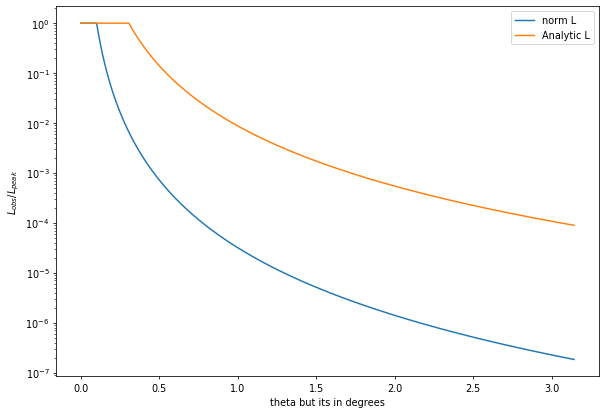

In [10]:
import numpy as np
import scipy as sp
from scipy import integrate
from scipy import interpolate
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7), dpi=70)

#--------------------------------
#################Simulation PW Function Gamma
#Simulation Epsilon Setup
SPW_Etheta = pd.read_csv('func_epsilon_delta_45_theta_01.csv', sep = ',', header = None, names = ['theta','L'])
#set the epislon function to be 1 before drop off
i = 0
SPW_RNE_arr = np.array([])
while (i <= 3142):
    if (SPW_Etheta['L'][i]/(.9999999999999970024)) > 1:
        SPW_RNEtheta_i = 1.0
    else:
        SPW_RNEtheta_i = SPW_Etheta['L'][i]/(.9999999999999970024)
    SPW_RNE_arr_i = np.array([SPW_RNEtheta_i])
    SPW_RNE_arr = np.append(SPW_RNE_arr, SPW_RNE_arr_i)
    i = i+1
SPW_RNE = SPW_RNE_arr.reshape(3143,1)

SPW_Analytic = pd.read_csv('MCprofileAnalytic.csv', sep = ',', header = None, names = ['theta','L'])

#Graphing    
x1 = SPW_Etheta['theta']
y1 = SPW_RNE
plt.plot(x1,y1,label='norm L')
x2 = SPW_Analytic['theta']
y2 = SPW_Analytic['L']
plt.plot(x2,y2,label='Analytic L')
#Graphing Boundaries
#plt.axvline(x=SPW_theta_core, ls='--', color='lightgray', label='piecewise zone')
#plt.axvline(x=2*SPW_theta_core, ls='--', color='lightgray')
plt.ylabel('$L_{obs} / L_{peak}$')
plt.xlabel('theta but its in degrees')
plt.yscale("log")
#plt.ylim(.0001,200)
#plt.xlim(0,0.3)
plt.legend()

In [ ]:
print(len(CPW1))
MCprofile = open("MCprofileAnalytic.csv", "w")
i=0
while (i < len(CPW1)):
    MCprofile.write(str(CPW1[i,0]) + "," + str(float(CPW1[i,1])) + "\n")
    i+=1
MCprofile.close()

Numerical Integral Profile Generation using Fitted Structure

In [ ]:
##### 2017 paper program #####
import numpy as np
import scipy as sp
from scipy import integrate
from scipy import interpolate
import pandas as pd
import matplotlib.pyplot as plt

##declares
theta_o = 0.0
phi = 0.0
PT_arr = np.array([])
Lo_arr = np.array([])
obs_arr = np.array([])
gammas = [11.0]

##formula stuff
Gtheta = pd.read_csv('func_gammafit.csv', sep = ',', header = None, names = ['theta','gamma'])
Ltheta = pd.read_csv('func_epsilonfit.csv', sep = ',', header = None, names = ['theta','L'])
Btheta = np.sqrt(1-(1/((Gtheta['gamma'])**2)))

##theta max index calculator
for inmin in gammas:
    Gadjust = (Gtheta['gamma']-inmin)**2
    Gmin = np.where(Gadjust == Gadjust.min())
    GminFar = max(Gmin[0])+1
    theta_max = (int(GminFar)*0.1)
    
    ##theta observed selection and phi integral
    while (theta_o <= (91.0*np.pi/180.0)):
        ##phi selection and theta integral
        while (phi <= 2*np.pi):
            cosalph = (np.cos(theta_o)*np.cos(Ltheta['theta'][0:GminFar]*np.pi/180))+(np.sin(theta_o)*np.sin(Ltheta['theta'][0:GminFar]*np.pi/180)*np.cos(phi))
            num = Ltheta['L']*np.sin(Ltheta['theta'][0:GminFar]*np.pi/180)
            den = 4*np.pi*(Gtheta['gamma'][0:GminFar]**4)*((1-(Btheta*cosalph))**3)
            ans = (num/den)
            theta_int = sp.integrate.trapz(y = ans[0:GminFar], x = Ltheta['theta'][0:GminFar])
            PT_arr_i = np.array([(phi*180.0/np.pi), theta_int])
            PT_arr = np.append(PT_arr, PT_arr_i, 0)
            phi = phi+2*np.pi/72 #2*np.pi/n, count by 360/n degrees at a time
        PT = PT_arr.reshape(73,2) #shape(n rows, 2 columns), n = (phi n + 1) ↓↓ [0:n, a] is the same
        phi_int = sp.integrate.trapz(y = (PT[0:73, 1]), x = (PT[0:73,0]))
        Lo_arr_i = np.array([(theta_o*180.0/np.pi), phi_int])
        Lo_arr = np.append(Lo_arr, Lo_arr_i, 0)    
        theta_o = theta_o+(0.01*np.pi/180.0) #n*np.pi/180, count by n degrees at a time
        phi = 0
        PT_arr = np.array([])
    Lo = Lo_arr.reshape(9101,2)
    Nval = max(Lo[0:9101,1])
    LoN = Lo[0:9101,1]/Nval
    
##Graphing of Normalized Function
plt.yscale("log")
x = Lo[0:9101,0]
y = LoN[0:9101]
plt.scatter(x,y)

In [ ]:
MCprofile = open("MCprofileFitIntegral_gamma11.csv", "w")
i=0
while (i < len(LoN)):
    MCprofile.write(str(Lo[i,0]*np.pi/180) + "," + str(LoN[i]) + "\n")
    i+=1
MCprofile.close()

Comparing the Analytical and Numerical Structures

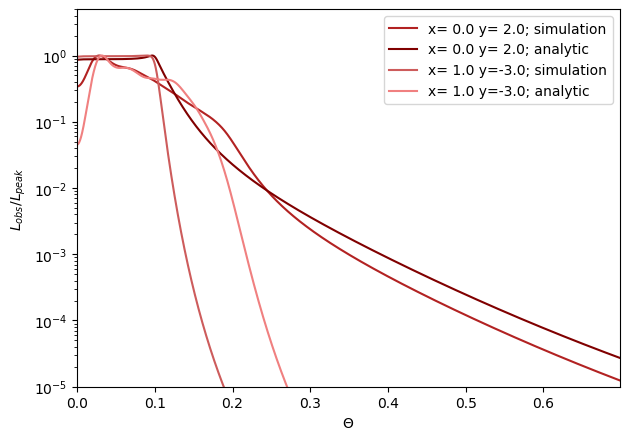

In [3]:
##### Double Integral #####
import numpy as np
import scipy as sp
from scipy import integrate
from scipy import interpolate
import pandas as pd
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7,5), dpi=100)

##declares
theta_o = 0.0
phi = 0.0
PT_arr = np.array([])
Lo_arr = np.array([])
obs_arr = np.array([])
gammas = [2.6]

##formula stuff
Gtheta = pd.read_csv('func_gamma_delta_45_theta_01deg.csv', sep = ',', header = None, names = ['theta','gamma'])
Ltheta = pd.read_csv('func_epsilon_delta_45_theta_01deg.csv', sep = ',', header = None, names = ['theta','L'])
Btheta = np.sqrt(1-(1/((Gtheta['gamma'])**2)))

##theta max index calculator
for inmin in gammas:
    Gadjust = (Gtheta['gamma']-inmin)**2
    Gmin = np.where(Gadjust == Gadjust.min())
    GminFar = max(Gmin[0])+1
    theta_max = (int(GminFar)*0.1)
    
    ##theta observed selection and phi integral
    while (theta_o <= (41.0*np.pi/180.0)):
        ##phi selection and theta integral
        while (phi <= 2*np.pi):
            cosalph = (np.cos(theta_o)*np.cos(Ltheta['theta'][0:GminFar]*np.pi/180))+(np.sin(theta_o)*np.sin(Ltheta['theta'][0:GminFar]*np.pi/180)*np.cos(phi))
            num = Ltheta['L']*np.sin(Ltheta['theta'][0:GminFar]*np.pi/180)
            den = 4*np.pi*(Gtheta['gamma'][0:GminFar]**4)*((1-(Btheta*cosalph))**3)
            ans = (num/den)
            theta_int = sp.integrate.trapz(y = ans[0:GminFar], x = Ltheta['theta'][0:GminFar])
            PT_arr_i = np.array([(phi*180.0/np.pi), theta_int])
            PT_arr = np.append(PT_arr, PT_arr_i, 0)
            phi = phi+2*np.pi/72 #2*np.pi/n, count by 360/n degrees at a time
        PT = PT_arr.reshape(73,2) #shape(n rows, 2 columns), n = (phi n + 1) ↓↓ [0:n, a] is the same
        phi_int = sp.integrate.trapz(y = (PT[0:73, 1]), x = (PT[0:73,0]))
        Lo_arr_i = np.array([(theta_o*180.0/np.pi), phi_int])
        Lo_arr = np.append(Lo_arr, Lo_arr_i, 0)    
        theta_o = theta_o+(0.1*np.pi/180.0) #n*np.pi/180, count by n degrees at a time
        phi = 0
        PT_arr = np.array([])
    Lo = Lo_arr.reshape(410,2)
    Nval = max(Lo[0:410,1])
    LoN = Lo[0:410,1]/Nval
    
##Graphing of Normalized Function
plt.yscale("log")
x1 = np.pi/180*Lo[0:410,0]
y1 = LoN[0:410]

#-----------------------------
##### 3-piece piecewise #####

#Simulation Structure
SPW_Etheta = pd.read_csv('func_epsilon_delta_45_theta_01deg.csv', sep = ',', header = None, names = ['theta','L'])
SPW_Gtheta = pd.read_csv('func_gamma_delta_45_theta_01deg.csv', sep = ',', header = None, names = ['theta','G'])
SPW_Nval = max(SPW_Gtheta['G'])
SPW_NGtheta = SPW_Gtheta['G']/SPW_Nval
i = 0
SPW_RNE_arr = np.array([])
while (i < 401):
    if (SPW_Etheta['L'][i]/(.9473153796762081580)) > 1:
        SPW_RNEtheta_i = 1.0
    else:
        SPW_RNEtheta_i = SPW_Etheta['L'][i]/(.9473153796762081580)
    SPW_RNE_arr_i = np.array([SPW_RNEtheta_i])
    SPW_RNE_arr = np.append(SPW_RNE_arr, SPW_RNE_arr_i)
    i = i+1
SPW_RNE = SPW_RNE_arr.reshape(401,1)

#Simulation Piecewise Array
spw_arr2 = np.array([])
SPW_theta_core = 5.729
SPW_theta_o = 0.0
SPW_Gamma2 = 100.0
while (SPW_theta_o <= 40.0):
    if SPW_theta_o < SPW_theta_core:
        Sy2 = 1
    elif SPW_theta_core < SPW_theta_o < 2*SPW_theta_core:
        Sq2 = (SPW_theta_o-SPW_theta_core)*SPW_Gamma2
        Sy2 = Sq2**(-4)
    elif 2*SPW_theta_core < SPW_theta_o:
        Sq2 = (SPW_theta_o-SPW_theta_core)*SPW_Gamma2
        Sy2 = (Sq2**(-6))*((SPW_theta_core*SPW_Gamma2)**2)
    spw_arr2_i = np.array([(SPW_theta_o), Sy2])
    spw_arr2 = np.append(spw_arr2, spw_arr2_i, 0)
    SPW_theta_o = SPW_theta_o + 0.1
SPW2 = spw_arr2.reshape(400,2)

#Piecewise-Structure Max Comparison
i=0
CompPW2_arr = np.array([])
while (i < 400):
    Cmax2 = max(SPW_RNE[i],SPW2[i,1])
    CompPW2_arr_i = np.array([SPW2[i,0], Cmax2])
    CompPW2_arr = np.append(CompPW2_arr, CompPW2_arr_i, 0)
    i+=1
CPW2 = CompPW2_arr.reshape(400,2)

#Graphing    
x3 = np.pi/180*CPW2[0:400,0]
y3 = CPW2[0:400,1]

#--------------------
##### Just Epsilon/Luminosity #####
Profilej = pd.read_csv('MCprofileR_x0_y2.csv', sep = ',', header = None, names = ['theta','L'])
x2 = Profilej['theta']
y2 = Profilej['L']

#--------------------
Profile1 = pd.read_csv('MCprofileAnalyticx0y2.csv', sep = ',', header = None, names = ['theta','L'])
x4 = Profile1['theta']
y4 = Profile1['L']

#--------------------
Profile3 = pd.read_csv('MCprofileR_x1_yn3.csv', sep = ',', header = None, names = ['theta','L'])
x5 = Profile3['theta']
y5 = Profile3['L']

#--------------------
Profile2 = pd.read_csv('MCprofileAnalyticx1yn3.csv', sep = ',', header = None, names = ['theta','L'])
x6 = Profile2['theta']
y6 = Profile2['L']


#plt.plot(x3,y3,color='grey',label='Power Law Approximation')
plt.plot(x2,y2,label='x= 0.0 y= 2.0; simulation', color='firebrick')
plt.plot(x4,y4,label='x= 0.0 y= 2.0; analytic', color='maroon')
#plt.plot(x1,y1,label='Double Integral: $\delta$=4.5 $\Theta_{0}$=0.1', color='firebrick')
plt.plot(x6,y6,label='x= 1.0 y=-3.0; simulation', color='indianred')
plt.plot(x5,y5,label='x= 1.0 y=-3.0; analytic', color='lightcoral')

plt.ylabel('$L_{obs} / L_{peak}$')
plt.xlabel('$\Theta$')
plt.xlim(0,0.698131701)
plt.ylim(10.0**-5,5)
plt.legend()

plt.savefig('2022profilesv2.png')

Comparing Gammas of Analytical Profiles to R(theta) Profiles

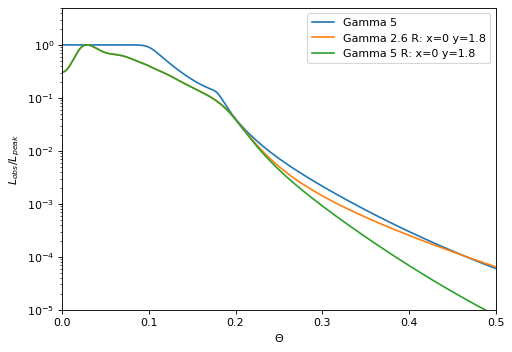

In [12]:
import numpy as np
import scipy as sp
from scipy import integrate
from scipy import interpolate
import pandas as pd
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7,5), dpi=80)
plt.yscale("log")

#--------------------
Profile1 = pd.read_csv('MCprofileFitIntegral_gamma2-6.csv', sep = ',', header = None, names = ['theta','L'])
x1 = Profile1['theta']
y1 = Profile1['L']

#--------------------
Profile3 = pd.read_csv('MCprofileFitIntegral_gamma3.csv', sep = ',', header = None, names = ['theta','L'])
x2 = Profile3['theta']
y2 = Profile3['L']

#--------------------
Profile5 = pd.read_csv('MCprofileFitIntegral_gamma5.csv', sep = ',', header = None, names = ['theta','L'])
x3 = Profile5['theta']
y3 = Profile5['L']

#--------------------
Profile7 = pd.read_csv('MCprofileFitIntegral_gamma7.csv', sep = ',', header = None, names = ['theta','L'])
x4 = Profile7['theta']
y4 = Profile7['L']

#--------------------
Profile9 = pd.read_csv('MCprofileFitIntegral_gamma9.csv', sep = ',', header = None, names = ['theta','L'])
x5 = Profile9['theta']
y5 = Profile9['L']

#--------------------
Profilea = pd.read_csv('MCprofileR_x0_y22.csv', sep = ',', header = None, names = ['theta','L'])
x6 = Profilea['theta']
y6 = Profilea['L']

#--------------------
Profileb = pd.read_csv('MCprofileR_x0_y2.csv', sep = ',', header = None, names = ['theta','L'])
x7 = Profileb['theta']
y7 = Profileb['L']

#--------------------
Profilec = pd.read_csv('MCprofileR_x0_y18.csv', sep = ',', header = None, names = ['theta','L'])
x8 = Profilec['theta']
y8 = Profilec['L']

#--------------------
Profiled = pd.read_csv('MCprofileR_x0_y17.csv', sep = ',', header = None, names = ['theta','L'])
x9 = Profiled['theta']
y9 = Profiled['L']

#--------------------
Profiled = pd.read_csv('MCprofileR_x0_y15.csv', sep = ',', header = None, names = ['theta','L'])
x10 = Profiled['theta']
y10 = Profiled['L']

#--------------------
Profile11 = pd.read_csv('MCprofileFitIntegral_gamma11.csv', sep = ',', header = None, names = ['theta','L'])
x11 = Profile11['theta']
y11 = Profile11['L']

#--------------------
Profilee = pd.read_csv('MCprofileR_x0_y13.csv', sep = ',', header = None, names = ['theta','L'])
x12 = Profilee['theta']
y12 = Profilee['L']

#--------------------
Profilef = pd.read_csv('MCprofileg5R_x0_y18.csv', sep = ',', header = None, names = ['theta','L'])
x13 = Profilef['theta']
y13 = Profilef['L']

#plt.plot(x1,y1,label='Gamma 2.6')
#plt.plot(x6,y6,label='Gamma 2.6 R: x=0 y=2.2')
#plt.plot(x2,y2,label='Gamma 3')
#plt.plot(x7,y7,label='Gamma 2.6 R: x=0 y=2')
plt.plot(x3,y3,label='Gamma 5')
plt.plot(x8,y8,label='Gamma 2.6 R: x=0 y=1.8')
#plt.plot(x4,y4,label='Gamma 7')
#plt.plot(x9,y9,label='Gamma 2.6 R: x=0 y=1.7')
#plt.plot(x5,y5,label='Gamma 9')
#plt.plot(x10,y10,label='Gamma 2.6 R: x=0 y=1.5')
#plt.plot(x11,y11,label='Gamma 11')
#plt.plot(x12,y12,label='Gamma 2.6 R: x=0 y=1.3')
plt.plot(x13,y13,label='Gamma 5 R: x=0 y=1.8')


plt.ylabel('$L_{obs} / L_{peak}$')
plt.xlabel('$\Theta$')
plt.xlim(0,0.5)
plt.ylim(10.0**-5,5)
plt.legend()

#plt.savefig('26rs.png')

Comparing Gammas for Analytical Profiles

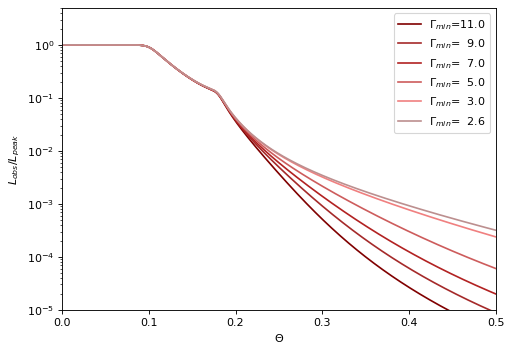

In [2]:
import numpy as np
import scipy as sp
from scipy import integrate
from scipy import interpolate
import pandas as pd
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7,5), dpi=80)
plt.yscale("log")
#plt.title("y=-3.0")

#--------------------
Profile1 = pd.read_csv('MCprofileFitIntegral_gamma11.csv', sep = ',', header = None, names = ['theta','L'])
x1 = Profile1['theta']
y1 = Profile1['L']

#--------------------
Profile2 = pd.read_csv('MCprofileFitIntegral_gamma9.csv', sep = ',', header = None, names = ['theta','L'])
x2 = Profile2['theta']
y2 = Profile2['L']

#--------------------
Profile3 = pd.read_csv('MCprofileFitIntegral_gamma7.csv', sep = ',', header = None, names = ['theta','L'])
x3 = Profile3['theta']
y3 = Profile3['L']

#--------------------
Profile4 = pd.read_csv('MCprofileFitIntegral_gamma5.csv', sep = ',', header = None, names = ['theta','L'])
x4 = Profile4['theta']
y4 = Profile4['L']

#--------------------
Profile5 = pd.read_csv('MCprofileFitIntegral_gamma3.csv', sep = ',', header = None, names = ['theta','L'])
x5 = Profile5['theta']
y5 = Profile5['L']

#--------------------
Profile6 = pd.read_csv('MCprofileFitIntegral_gamma2-6.csv', sep = ',', header = None, names = ['theta','L'])
x6 = Profile6['theta']
y6 = Profile6['L']

plt.plot(x1,y1,label='$\Gamma_{min}$=11.0',color='maroon') #,linewidth=5)
plt.plot(x2,y2,label='$\Gamma_{min}$=  9.0',color='brown')
plt.plot(x3,y3,label='$\Gamma_{min}$=  7.0',color='firebrick') #,linewidth=5)
plt.plot(x4,y4,label='$\Gamma_{min}$=  5.0',color='indianred') #,linewidth=5)
plt.plot(x5,y5,label='$\Gamma_{min}$=  3.0',color='lightcoral') #,linewidth=5)
plt.plot(x6,y6,label='$\Gamma_{min}$=  2.6',color='rosybrown') #,linewidth=5)

plt.ylabel('$L_{obs} / L_{peak}$')
plt.xlabel('$\Theta$')
plt.xlim(0,0.5)
plt.ylim(10.0**-5,5)
plt.legend()

#plt.savefig('g26yn3.png')